In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from network import ConstantBirthNode, DynamicBirthNode, Network
from reactions import Reactions, CmeParameters, OdeParameters
from simulate import simulate_gillespie, simulate_ode
from analysis import SdeResults

In [2]:
DELTA = 1

node0 = ConstantBirthNode(60, 0.2, 0.2)
node1 = DynamicBirthNode(60, 0.2, 0.2, 60, 0.01, DELTA)
node2 = DynamicBirthNode(60, 0.1, 0.1, 60, 0.01, DELTA)

network = Network()
network.add_node(node0)
network.add_node(node1)
network.add_node(node2)
network.allocate_ids()

network.add_transport(node0, node1, rate = 0.05)
network.add_transport(node1, node0, rate = 0.05)
network.add_transport(node1, node2, rate = 0.03)
network.add_transport(node2, node1, rate = 0.03)

print("Nodes in the Network:")
for node in network.nodes: print(node)

print("\nEdges in the network:")
for s, d, in network.edges:
    print(s, d)

reactions = Reactions(network)

print("\nReactions:")
for reaction in reactions.reactions:
    print(reaction)

Nodes in the Network:
ConstantBirthNode(id:0)
DynamicBirthNode(id:1)
DynamicBirthNode(id:2)

Edges in the network:
ConstantBirthNode(id:0) DynamicBirthNode(id:1)
DynamicBirthNode(id:1) ConstantBirthNode(id:0)
DynamicBirthNode(id:1) DynamicBirthNode(id:2)
DynamicBirthNode(id:2) DynamicBirthNode(id:1)

Reactions:
BirthReaction(n0_t0, rate: 0.2)
BirthReaction(n0_t1, rate: 0.2)
BirthReaction(n1_t0, rate: Dynamic)
BirthReaction(n1_t1, rate: Dynamic)
BirthReaction(n2_t0, rate: Dynamic)
BirthReaction(n2_t1, rate: Dynamic)
DeathReaction(n0_t0, rate: 0.2)
DeathReaction(n0_t1, rate: 0.2)
DeathReaction(n1_t0, rate: 0.2)
DeathReaction(n1_t1, rate: 0.2)
DeathReaction(n2_t0, rate: 0.1)
DeathReaction(n2_t1, rate: 0.1)
TransportReaction(from: n0_t0, to: n1_t0,  rate: 0.05)
TransportReaction(from: n0_t1, to: n1_t1,  rate: 0.05)
TransportReaction(from: n1_t0, to: n0_t0,  rate: 0.05)
TransportReaction(from: n1_t1, to: n0_t1,  rate: 0.05)
TransportReaction(from: n1_t0, to: n2_t0,  rate: 0.03)
TransportRea

In [3]:
MAX_T = 100
TIME_POINTS = np.linspace(0, MAX_T, 101)

start_statevec = np.array([20, 0, 20, 0, 20, 0])

Reaction Matrix:
[[ 1  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  1]
 [-1  0  0  0  0  0]
 [ 0 -1  0  0  0  0]
 [ 0  0 -1  0  0  0]
 [ 0  0  0 -1  0  0]
 [ 0  0  0  0 -1  0]
 [ 0  0  0  0  0 -1]
 [-1  0  1  0  0  0]
 [ 0 -1  0  1  0  0]
 [ 1  0 -1  0  0  0]
 [ 0  1  0 -1  0  0]
 [ 0  0 -1  0  1  0]
 [ 0  0  0 -1  0  1]
 [ 0  0  1  0 -1  0]
 [ 0  0  0  1  0 -1]]
Reaction Rates:
[ 0.2   0.2  -1.   -1.   -1.   -1.    0.2   0.2   0.2   0.2   0.1   0.1
  0.05  0.05  0.05  0.05  0.03  0.03  0.03  0.03]
Statevec i:
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 2 3 4 5]
Dynamic Birth Parameters:
[2 4]
[0.  0.  0.2 0.2 0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[ 0.  0. 60. 60. 60. 60.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[ 0.  0. 60. 60. 60. 60.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Simulating using gillespie.

100%|██████████| 10/10 [00:00<00:00, 92.53it/s]


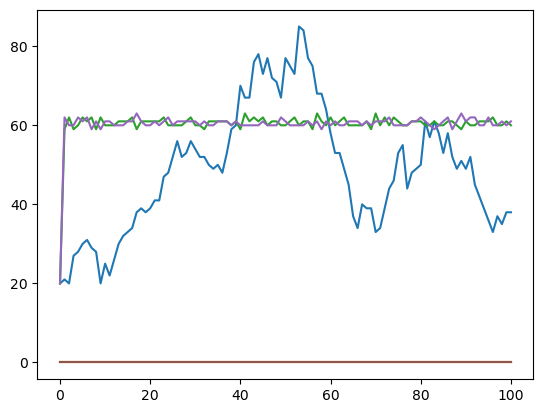

In [7]:
cme_param = CmeParameters(reactions)
print(cme_param)

REPLICATES = 10
gill_results = simulate_gillespie(cme_param, TIME_POINTS, start_statevec, REPLICATES)

plt.plot(gill_results[0].T)
plt.show()

array([[20, 19, 21, 19, 19, 20, 19, 19, 19, 20, 18, 17, 22, 27, 27, 27,
        26, 25, 20, 24, 34, 39, 42, 43, 39, 41, 34, 40, 47, 55, 62, 66,
        68, 65, 68, 74, 81, 95, 96, 84, 76, 67, 67, 68, 69, 63, 55, 58,
        65, 75, 70, 74, 72, 73, 78, 77, 84, 81, 82, 87, 83, 83, 71, 73,
        73, 76, 75, 78, 65, 64, 67, 65, 68, 73, 79, 84, 72, 71, 74, 94,
        96, 94, 92, 99, 93, 86, 83, 86, 75, 83, 83, 87, 86, 89, 80, 79,
        91, 94, 87, 83, 84],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [20, 61, 60, 61, 59, 60, 60, 62, 60, 60, 61, 59, 60, 59, 61, 59,
      

global ODE_model
def ODE_model(t, z):
# Variables (<node.id>_<etype>):
	n0_t0, n0_t1, n1_t0, n1_t1, n2_t0, n2_t1 = z
# Terms for each variable:
	return [
# Δn0_t0/Δt	<birth>    <death>    <outflow>      <inflow>
		+n0_t0*0.2 -n0_t0*0.2 -n0_t0*(+0.05) +(+n1_t0*0.05) ,
# Δn0_t1/Δt	<birth>    <death>    <outflow>      <inflow>
		+n0_t1*0.2 -n0_t1*0.2 -n0_t1*(+0.05) +(+n1_t1*0.05) ,
# Δn1_t0/Δt	<birth>                                           <death>    <outflow>           <inflow>
		+n1_t0*np.max([0, 0.2+0.01*(60-n1_t0-(1*n1_t1))]) -n1_t0*0.2 -n1_t0*(+0.05+0.03) +(+n0_t0*0.05+n2_t0*0.03) ,
# Δn1_t1/Δt	<birth>                                           <death>    <outflow>           <inflow>
		+n1_t1*np.max([0, 0.2+0.01*(60-n1_t0-(1*n1_t1))]) -n1_t1*0.2 -n1_t1*(+0.05+0.03) +(+n0_t1*0.05+n2_t1*0.03) ,
# Δn2_t0/Δt	<birth>                                           <death>    <outflow>      <inflow>
		+n2_t0*np.max([0, 0.1+0.01*(60-n2_t0-(1*n2_t1))]) -n2_t0*0.1 -n2_t0*(+0.03) +(+n1_t0*0.03) ,


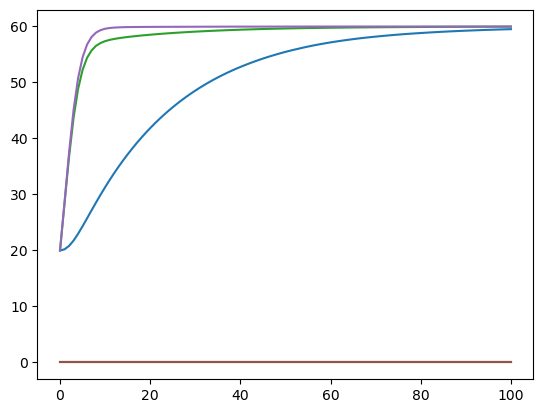

In [5]:
ode_param = OdeParameters(reactions)
print(ode_param)

ode_results = simulate_ode(ode_param, TIME_POINTS, start_statevec)

plt.plot(ode_results.T)
plt.show()

In [6]:
'''
This is a very very very extremely hacky function that works by collecting the parameters
of the differential equations from the parameters encoded in the network, uses this to make
a text python program, and then evaluates this python program and returns the output. 
'''
def ode_from_network(G, prnt = False):
    # collect data needed to generate the code
    nodenames, compartments = names_from_network(G)
    df_nodes, df_edges = dataframes_from_network(G, prnt=False) 

    # names of the variables (node names + wt and mt)
    vars = []
    for node in compartments:
        vars.append(f'{node}_wt')
        vars.append(f'{node}_mt')

    # for each variable, get the expression for how much it changes in a given time t
    diff_exp = ""    
    for var in vars: 
        node_type = var[-2:]
        node_name = var[:-3]
        var_wt_name = f'{node_name}_wt'
        var_mt_name = f'{node_name}_mt'
        
        # get corresponding node row in row dataframe
        noderow = df_nodes.loc[df_nodes['node'] == node_name]
        
        # collect numeric values of specific parameters
        cb = float(noderow['c_b'])
        birthrate = float(noderow['birth_rate'])
        nss = int(noderow['nss'])
        delta = float(noderow['delta'])
        deathrate = float(noderow['death_rate'])

        # generate birth rate
        if   int(noderow["birth_type"]) == 0:
            birth_term = '0'
        elif int(noderow["birth_type"]) == 1:
            birth_term = f"({birthrate})"
        elif int(noderow["birth_type"]) == 2:
            birth_term = f"({birthrate} + {cb}*({nss}-{var_wt_name}-({delta}*{var_mt_name})))"
            
        # generate death rate
        death_term = f"({deathrate})"
        
        # generate terms for outflow
        edges_outrow = df_edges[df_edges['source'] == node_name]
        
        out_term = f"({round(edges_outrow['rate'].sum(), 8)})"

        # generate terms for inflow
        edges_inrow = df_edges[df_edges['target'] == node_name]
        in_term = ''
        for index, row in edges_inrow.iterrows():
            in_term += f"+({str(row['source'])}_{node_type}*{float(row['rate'])})"
        
        diff_exp += f"\t\t# Δ{var}/Δt\n\t\t({var}*({birth_term}-{death_term}-{out_term})){in_term},\n"

    # set up function
    fulltext = "global ODE_model\ndef ODE_model(t, z):\n"

    # set up tuple of variables
    vars_for_code = str((str(vars)[1:-1]).replace("'",""))
    fulltext += f'\t# variables (node name + wt/mt)\n\t{vars_for_code} = z'
    
    # set up how each variable changes
    fulltext += f"\n\treturn [\n{diff_exp}\t\t]"
    
    if prnt == True:
        print(">> Code for ODE model:\n")
        print(fulltext)

    # execute the code generated by the process
    global ODE_model
    ODE_model = None
    exec(fulltext)

    return ODE_model